# Non-Linear Regression

In this notebook we will explore a little bit the topic of non-linear regression. Recall that the predictions of a linear model look like


$\hat{y}=\hat{f}(\mathbf{x}) = x_{0}\times w_{0} + x_{1}\times w_{1} + ... + x_{i}\times w_{i} + ... + x_{d}\times w_{d} = \sum_{i=1}^{d} x_{i}\times w_{i}$

To make the same algorithm work to make non-linear regression we simple transform the input features $\mathbf{x}$, so that predictions look as follow:

$\hat{y}=\hat{f}(\phi({\mathbf{x}))}$,

where $\phi$ is any non-linear function that you want and can produce more or less features than presented in the original $\mathbf{x}$ and $\hat{f}$ is the same dot product between the weight vector and the feature vector.

## Setup

Some imports

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

I assume you have completed `notebook_01` so we will just copy somethings from there without repeated analysis

In [2]:
import lib, utils
%load_ext autoreload
%autoreload 2

In [3]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X, y = data[:, :1], data[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

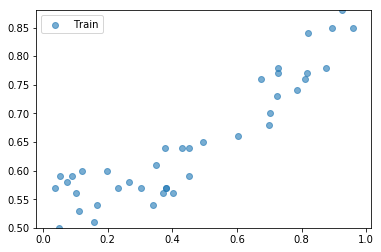

In [4]:
utils.make_plot(X_train, y_train)

So that's our data, let's get started!

## Baseline model

A non-linear regression model is just a bit more complicated than a linear one, but it does not mean it will always have better results. In fact, we suggest you to always have a linear regression model as a baseline, and that is what we are about to do now.

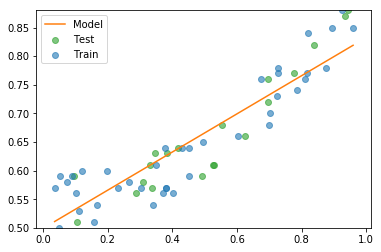

Mean Squared Error on train set: 0.001819
Mean Squared Error on test set: 0.001733
Norm of the weights: 0.600241
Variance of the weights: 0.006863


In [6]:
lineal_model = lib.LinearRegression()
lineal_model.fit(X_train, y_train, method='normal equations')
utils.make_plot(X_train, y_train, X_test, y_test, lineal_model)
y_pred = lineal_model.predict(X_train)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = lineal_model.predict(X_test)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(lineal_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(lineal_model.coef)))

Again, we hope it is not necessary to explain again everything we did in `notebook_01`. Now we are ready to try fancy non-linear methods.

## Polynomial model

For a polynomial model we simply make the $\phi$ function defined avobe to do the following (for the case of a second degree polynomial):

$\phi_{2}(\mathbf{x}) := x_0 + x_1 + ... + x_i + ... + x_d + x_{0}^{2} + x_{1}^{2} + x_{i}^{2} + ... + x_{d}^{2}$

Try to think of the cases where we have polynomials of arbitrary degrees.

The following function will let us define the transformation of the original features in polynomial features.

In [7]:
def polynomial_features(X, degree=2):
    X_ = preprocessing.PolynomialFeatures(
            degree=degree, include_bias=False).fit_transform(X.copy())
    return X_

**Second degree polynomial**

In [9]:
X_train_poly2 = polynomial_features(X_train)
X_test_poly2 = polynomial_features(X_test)

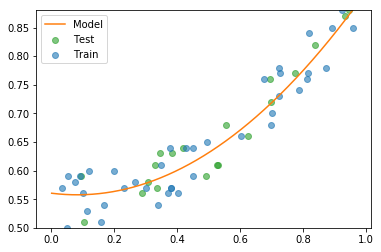

Mean Squared Error on train set: 0.001016
Mean Squared Error on test set: 0.000805
Norm of the weights: 0.704161
Variance of the weights: 0.072821


In [10]:
degree2_model = lib.LinearRegression()
degree2_model.fit(X_train_poly2, y_train, method='normal equations')
utils.make_plot(X_train_poly2, y_train, X_test_poly2, y_test, degree2_model, feature_extractor=lambda x: polynomial_features(x, degree=2))
y_pred = degree2_model.predict(X_train_poly2)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = degree2_model.predict(X_test_poly2)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(degree2_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(degree2_model.coef)))

**Fourth degree**

In [11]:
X_train_poly4 = polynomial_features(X_train, degree=4)
X_test_poly4 = polynomial_features(X_test, degree=4)

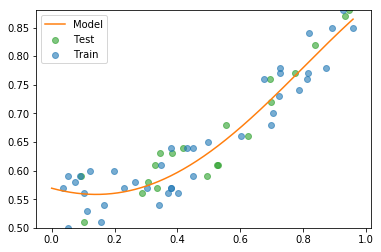

Mean Squared Error on train set: 0.000988
Mean Squared Error on test set: 0.000865
Norm of the weights: 0.865190
Variance of the weights: 0.118435


In [13]:
degree4_model = lib.LinearRegression()
degree4_model.fit(X_train_poly4, y_train, method='normal equations')
utils.make_plot(X_train_poly4, y_train, X_test_poly4, y_test, degree4_model, feature_extractor=lambda x: polynomial_features(x, degree=4))
y_pred = degree4_model.predict(X_train_poly4)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = degree4_model.predict(X_test_poly4)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(degree4_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(degree4_model.coef)))

**Sixth degree**

In [14]:
X_train_poly6 = polynomial_features(X_train, degree=6)
X_test_poly6 = polynomial_features(X_test, degree=6)

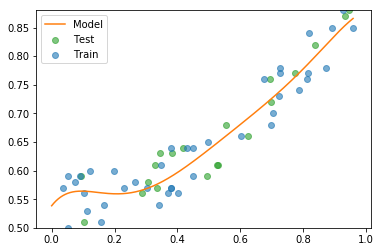

Mean Squared Error on train set: 0.000979
Mean Squared Error on test set: 0.000964
Norm of the weights: 62.486248
Variance of the weights: 557.774388


In [15]:
degree6_model = lib.LinearRegression()
degree6_model.fit(X_train_poly6, y_train, method='normal equations')
utils.make_plot(X_train_poly6, y_train, X_test_poly6, y_test, degree6_model, feature_extractor=lambda x: polynomial_features(x, degree=6))
y_pred = degree6_model.predict(X_train_poly6)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = degree6_model.predict(X_test_poly6)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(degree6_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(degree6_model.coef)))

**Eigth degree**

In [16]:
X_train_poly8 = polynomial_features(X_train, degree=8)
X_test_poly8 = polynomial_features(X_test, degree=8)

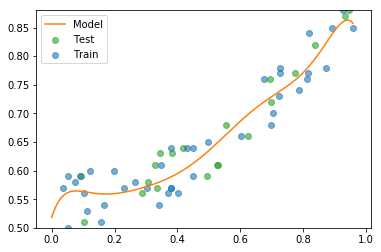

Mean Squared Error on train set: 0.000964
Mean Squared Error on test set: 0.000956
Norm of the weights: 2245.832640
Variance of the weights: 560418.242324


In [18]:
degree8_model = lib.LinearRegression()
degree8_model.fit(X_train_poly8, y_train, method='normal equations')
utils.make_plot(X_train_poly8, y_train, X_test_poly8, y_test, degree8_model, feature_extractor=lambda x: polynomial_features(x, degree=8))
y_pred = degree8_model.predict(X_train_poly8)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = degree8_model.predict(X_test_poly8)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(degree8_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(degree8_model.coef)))

**N degree**

Hopefully at this point you have notice that changing the degree changes a bit the model generated and also that the training error goes down while the test error goes up. If there are doubts, let us do it one more time.

In [19]:
X_train_poly10 = polynomial_features(X_train, degree=10)
X_test_poly10 = polynomial_features(X_test, degree=10)

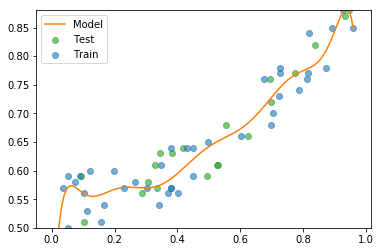

Mean Squared Error on train set: 0.000923
Mean Squared Error on test set: 0.001015
Norm of the weights: 229648.313098
Variance of the weights: 4794395246.250229


In [20]:
degree10_model = lib.LinearRegression()
degree10_model.fit(X_train_poly10, y_train, method='normal equations')
utils.make_plot(X_train_poly10, y_train, X_test_poly10, y_test, degree10_model, feature_extractor=lambda x: polynomial_features(x, degree=10))
y_pred = degree10_model.predict(X_train_poly10)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = degree10_model.predict(X_test_poly10)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(degree10_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(degree10_model.coef)))

## Final thoughts

Here are some things you need to remember from this notebook:
- You can have a non-linear model using a linear regression by simply transforming your features $\mathbf{x}$ with any non-linear function $\phi$
- The higher the polynomial the higher the complexity of the model, that is, it can adjust for more points.
- If you give the model too much complexity it can pass very closely to the training data (lower training error), but it will not be a good fit to the test data (higher test error); this is called **overfitting**.
- As you model overfits more, your weights have higher norm and variance.

Now you are ready to go to the next task, where we will add **regularization** to our models in order to fight the **overfitting** problem mentioned above.